In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt

BASE = "/home/hep/an1522/dark_tridents_wspace/outputs/training_metrics"

FILES = {
    "MPID": "DM-CNN_training_metrics_20260116-06_13_PM_0.001_AG_GN_LM_TRAINING.csv",
    "ResNet18": "resnet18_gn_training_metrics_20260122-08_26_PM.csv",
    "ResNet34": "resnet34_gn_training_metrics_20260122-08_28_PM.csv",
}

# # rolling window in "points" (not steps). Adjust if you want smoother/less smooth.
WINDOW = 25
MINP = max(3, WINDOW // 5)

def load_metrics(path):
    df = pd.read_csv(path)

    # Ensure numeric + sorted by step
    df["step"] = pd.to_numeric(df["step"], errors="coerce")
    df = df.dropna(subset=["step"]).sort_values("step")

    for col in ["train_accu","test_accu","train_loss","test_loss"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Moving averages (centered looks nicer for comparison)
    for col in ["train_accu","test_accu","train_loss","test_loss"]:
        df[col + "_ma"] = df[col].rolling(window=WINDOW, min_periods=MINP, center=True).mean()

    return df

runs = {name: load_metrics(os.path.join(BASE, fn)) for name, fn in FILES.items()}

# # --------- Train accuracy (smoothed) ----------
# plt.figure(figsize=(6,6))
# for name, df in runs.items():
#     plt.plot(df["step"], df["train_accu_ma"], label=f"{name} train")
#     # plt.plot(df["step"], df["test_accu"], alpha=0.15)
# plt.xlabel("Step")
# plt.ylabel("Accuracy (moving avg)")
# plt.title(f"Train accuracy vs step (rolling window={WINDOW})")
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # --------- Train loss (smoothed) ----------
# plt.figure(figsize=(10,6))
# for name, df in runs.items():
#     plt.plot(df["step"], df["train_loss_ma"], label=f"{name} train")
#     # plt.plot(df["step"], df["test_loss"], alpha=0.15)
# plt.xlabel("Step")
# plt.ylabel("Loss (moving avg)")
# plt.title(f"Train loss vs step (rolling window={WINDOW})")
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # --------- Test accuracy (smoothed) ----------
# plt.figure(figsize=(10,6))
# for name, df in runs.items():
#     plt.plot(df["step"], df["test_accu_ma"], label=f"{name} test")
#     # plt.plot(df["step"], df["test_accu"], alpha=0.15)
# plt.xlabel("Step")
# plt.ylabel("Accuracy (moving avg)")
# plt.title(f"Test accuracy vs step (rolling window={WINDOW})")
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # --------- Test loss (smoothed) ----------
# plt.figure(figsize=(10,6))
# for name, df in runs.items():
#     plt.plot(df["step"], df["test_loss_ma"], label=f"{name} test")
#     # plt.plot(df["step"], df["test_loss"], alpha=0.15)
# plt.xlabel("Step")
# plt.ylabel("Loss (moving avg)")
# plt.title(f"Test loss vs step (rolling window={WINDOW})")
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.ylim(0,1)
# plt.tight_layout()
# plt.show()


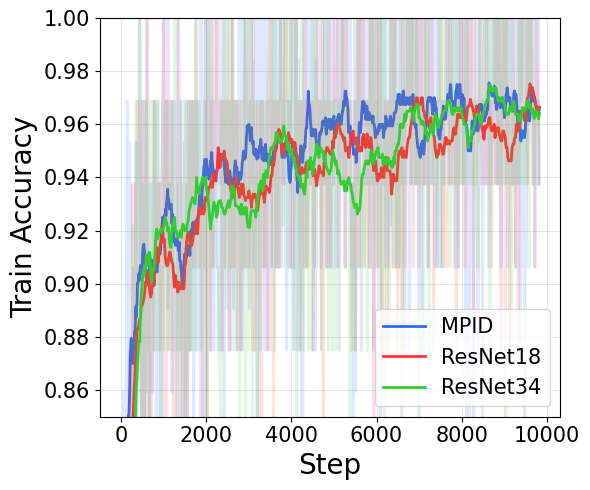

In [79]:
SAVE_DIR = "/home/hep/an1522/dark_tridents_wspace/outputs/masters_poster/training_metrics/"
os.makedirs(SAVE_DIR, exist_ok=True)

color_map = {
    'MPID': '#3366FF',      # medium blue
    'ResNet18': '#FF3333',  # medium red
    'ResNet34': '#33CC33'   # medium green
}

def plot_metric(runs, y_ma, y_raw, ylabel, filename, ylim=None, save_dir=SAVE_DIR):
    plt.figure(figsize=(6, 5))
    for name, df in runs.items():
        # (line,) = plt.plot(df["step"], df[y_ma], label=name)
        # c = line.get_color()
        # plt.plot(df["step"], df[y_raw], color=c, alpha=0.15)
        c = color_map[name]
        plt.plot(df["step"], df[y_ma], label=name, color=c, linewidth=2)
        plt.plot(df["step"], df[y_raw], color=c, alpha=0.15, linewidth=2)
    plt.xlabel("Step", fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    # plt.title(title, fontsize=20, pad=20)
    plt.tick_params(axis='both', labelsize=15)  # Add this line
    plt.grid(True, alpha=0.3)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.legend(fontsize=15)
    plt.tight_layout()
    outpath = os.path.join(save_dir, filename)
    plt.savefig(outpath, dpi=200, bbox_inches="tight")
    plt.show()
    plt.close()

# ---- calls
plot_metric(
    runs,
    y_ma="train_accu_ma", y_raw="train_accu",
    # title=f"Train accuracy vs step (rolling window={WINDOW})",
    ylabel="Train Accuracy",
    filename="train_accuracy.png",
    ylim=(0.85, 1)
)

# plot_metric(
#     runs,
#     y_ma="train_loss_ma", y_raw="train_loss",
#     # title=f"Train loss vs step (rolling window={WINDOW})",
#     ylabel="Loss",
#     filename="train_loss.png",
#     ylim=(0,0.4)
# )
